# Comparing Clustering Algorithms

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [4]:
# stats of numerical data
round (df.describe(exclude = 'object'), 2)

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.00,418.00,418.00,418.00,284.00,418.00,310.00,312.00,312.00,282.00,407.00,416.00,412.00
mean,209.50,1917.78,18533.35,3.22,369.51,3.50,97.65,1982.66,122.56,124.70,257.02,10.73,3.02
std,120.81,1104.67,3815.85,4.41,231.94,0.42,85.61,2140.39,56.70,65.15,98.33,1.02,0.88
min,1.00,41.00,9598.00,0.30,120.00,1.96,4.00,289.00,26.35,33.00,62.00,9.00,1.00
25%,105.25,1092.75,15644.50,0.80,249.50,3.24,41.25,871.50,80.60,84.25,188.50,10.00,2.00
50%,209.50,1730.00,18628.00,1.40,309.50,3.53,73.00,1259.00,114.70,108.00,251.00,10.60,3.00
75%,313.75,2613.50,21272.50,3.40,400.00,3.77,123.00,1980.00,151.90,151.00,318.00,11.10,4.00
max,418.00,4795.00,28650.00,28.00,1775.00,4.64,588.00,13862.40,457.25,598.00,721.00,18.00,4.00


In [5]:
# stats of categorical data
categorical_columns = df.select_dtypes(exclude=['float64', 'int64']).columns

if not categorical_columns.empty:
    categorical_description = df[categorical_columns].describe()
    print(round(categorical_description, 2))
else:
    print("No categorical columns found in the DataFrame.")

       Status             Drug  Sex Ascites Hepatomegaly Spiders Edema
count     418              312  418     312          312     312   418
unique      3                2    2       2            2       2     3
top         C  D-penicillamine    F       N            Y       N     N
freq      232              158  374     288          160     222   354


## Handling Missing Data

In [6]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [7]:
def handle_missing_data(df):
    """
    Replaces NaN values in numerical columns with the mean of the respective columns.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with numerical columns to handle missing data.
    
    Returns:
    pd.DataFrame: A DataFrame with missing numerical data replaced by column means.
    """
    numerical_columns = df.select_dtypes(include=[np.number]).columns
    
    for column in numerical_columns:
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    
    return df

df = handle_missing_data(df)

# Label Encoding

In [8]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [9]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

In [10]:
def encode_categorical_columns(df):
    """
    Encodes all categorical columns in the DataFrame using LabelEncoder.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with categorical columns to be encoded.
    
    Returns:
    pd.DataFrame: A DataFrame with all categorical columns encoded.
    """
    enc = LabelEncoder()
    categorical_columns = df.select_dtypes(include=['object']).columns
    
    for column in categorical_columns:
        df[column] = enc.fit_transform(df[column])
    
    return df

# Encode the categorical columns
df = encode_categorical_columns(df)

# Checking the Dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    int32  
 3   Drug           418 non-null    int32  
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    int32  
 6   Ascites        418 non-null    int32  
 7   Hepatomegaly   418 non-null    int32  
 8   Spiders        418 non-null    int32  
 9   Edema          418 non-null    int32  
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    418 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         418 non-null    float64
 14  Alk_Phos       418 non-null    float64
 15  SGOT           418 non-null    float64
 16  Tryglicerides  418 non-null    float64
 17  Platelets      418 non-null    float64
 18  Prothrombi

In [12]:
df.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [13]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,2,0,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,2,0,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,1,1,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# Data Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
# Select relevant features for clustering
all_features = df.columns
selected_features = []
X = df[all_features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA

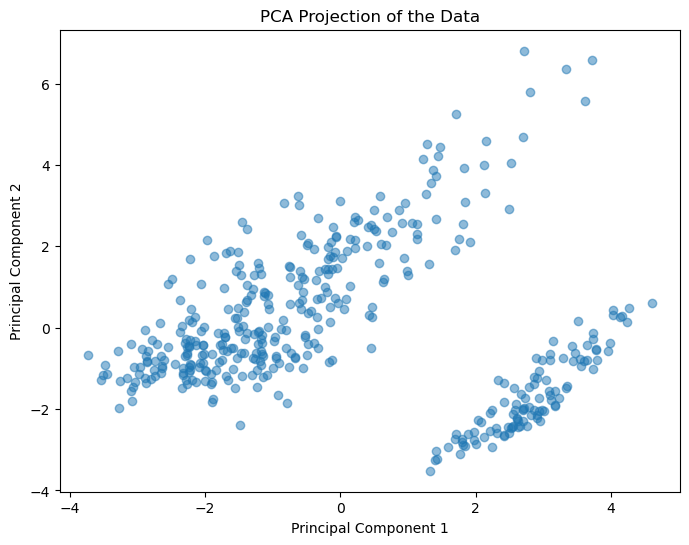

In [16]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title('PCA Projection of the Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Algorithms

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [18]:
# Custom scorer for silhouette score
def silhouette_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return silhouette_score(X, labels)

# Custom scorer for Davies-Bouldin score
def davies_bouldin_scorer(estimator, X):
    labels = estimator.fit_predict(X)
    return -davies_bouldin_score(X, labels)  # Negative because GridSearchCV maximizes the score

In [19]:
kmeans_params = {
    'n_clusters': range(2, 7),
    'init': ['k-means++'],
    'n_init': [10, 20, 30]
}

kmeans = KMeans(random_state=42)
kmeans_grid = GridSearchCV(kmeans, kmeans_params, scoring=silhouette_scorer, cv=5)
kmeans_grid.fit(X_pca)

print("Best KMeans parameters:", kmeans_grid.best_params_)
print("Best KMeans silhouette score:", kmeans_grid.best_score_)

Best KMeans parameters: {'init': 'k-means++', 'n_clusters': 2, 'n_init': 10}
Best KMeans silhouette score: 0.574356029451059


In [20]:
dbscan_params = {
  'eps': np.arange(0.1, 1.1, 0.1),
  'min_samples': range(2, 11),
}

dbscan = DBSCAN()
dbscan_grid = GridSearchCV(dbscan, dbscan_params, scoring=silhouette_scorer, cv=5)
dbscan_grid.fit(X_pca)

print("Best DBSCAN parameters:", dbscan_grid.best_params_)
print("Best DBSCAN silhouette score:", dbscan_grid.best_score_)

Best DBSCAN parameters: {'eps': 0.7000000000000001, 'min_samples': 10}
Best DBSCAN silhouette score: 0.42464604405119033


In [21]:
agg_params = {
    'n_clusters': range(2, 7),
    'linkage': ['ward', 'complete', 'average'],
    'affinity': ['euclidean', 'manhattan'],
}

agg = AgglomerativeClustering()
agg_grid = GridSearchCV(agg, agg_params, scoring=silhouette_scorer, cv=5)
agg_grid.fit(X_pca)

print("Best Agglomerative Clustering parameters:", agg_grid.best_params_)
print("Best Agglomerative Clustering silhouette score:", agg_grid.best_score_)

Best Agglomerative Clustering parameters: {'affinity': 'euclidean', 'linkage': 'average', 'n_clusters': 2}
Best Agglomerative Clustering silhouette score: 0.6066020203852096


In [22]:
spectral_params = {
    'n_clusters': [2, 3, 4, 5],
    'affinity': ['rbf', 'nearest_neighbors'],
    'gamma': [0.1, 0.5, 1.0],
    'assign_labels': ['kmeans', 'discretize'],
}

spectral = SpectralClustering(random_state=42)
spectral_grid = GridSearchCV(spectral, spectral_params, scoring=silhouette_scorer, cv=5)
spectral_grid.fit(X_pca)

print("Best Spectral Clustering parameters:", spectral_grid.best_params_)
print("Best Spectral Clustering silhouette score:", spectral_grid.best_score_)

Best Spectral Clustering parameters: {'affinity': 'rbf', 'assign_labels': 'kmeans', 'gamma': 1.0, 'n_clusters': 2}
Best Spectral Clustering silhouette score: 0.5903188026148201


In [23]:
# Set a global random seed
np.random.seed(42)

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Define clustering algorithms and parameters
algorithms = {
    'KMeans': KMeans(**kmeans_grid.best_params_),
    'DBSCAN': DBSCAN(**dbscan_grid.best_params_),
    'AgglomerativeClustering': AgglomerativeClustering(**agg_grid.best_params_),
    'SpectralClustering': SpectralClustering(**spectral_grid.best_params_),
}

# Evaluate clustering performance
results = []
for name, algorithm in algorithms.items():
    try:
        labels = algorithm.fit_predict(X_pca)
        silhouette_avg = silhouette_score(X_pca, labels)
        davies_bouldin_avg = davies_bouldin_score(X_pca, labels)
        results.append({'Algorithm': name, 'Silhouette Score': silhouette_avg, 'Davies-Bouldin Score': davies_bouldin_avg})
    except Exception as e:
        results.append({'Algorithm': name, 'Silhouette Score': 'Error: ' + str(e), 'Davies-Bouldin Score': 'Error: ' + str(e)})

# Print results
df_results = pd.DataFrame(results)
print(df_results)

                 Algorithm  Silhouette Score  Davies-Bouldin Score
0                   KMeans          0.539971              0.658512
1                   DBSCAN          0.531822              0.631336
2  AgglomerativeClustering          0.514670              0.430310
3       SpectralClustering          0.539971              0.658512
